# Imports and About

Import the needed packages for plotting and setup Matplotlib for inline plotting. This Jupyter notebook is used to summarized the data from the PAME experiments script (`pame-experiments.sh`) and statistical hypothesis tests for improvements. 

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from scipy.stats import f
from scipy.stats import norm

# Plotters

Load and plot the data from the MOA csv files. Provide a plot for each data set with each of the classification algorithms and build a matrix with the averaged accuracies, which will be used for testing for statistical improvements to the accuracy of a classifier. All of the plots are saved to the `plots/` directory as a `pdf`. 


/Users/gditzler/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


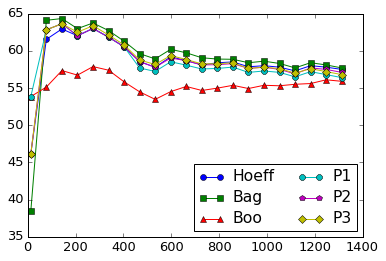

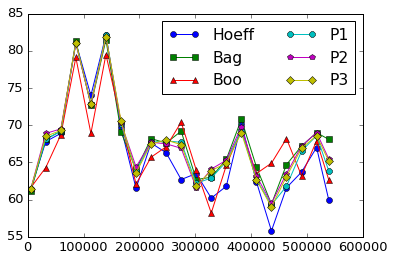

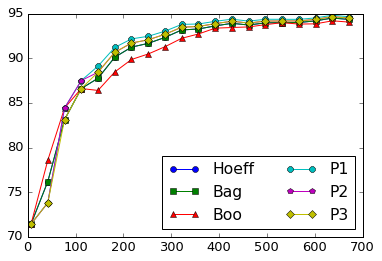

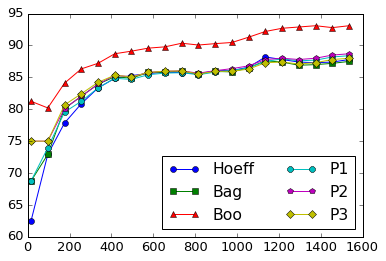

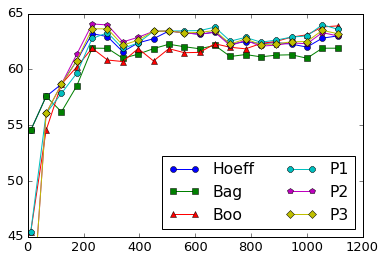

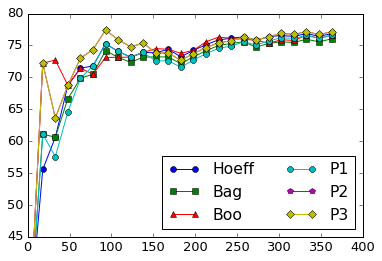

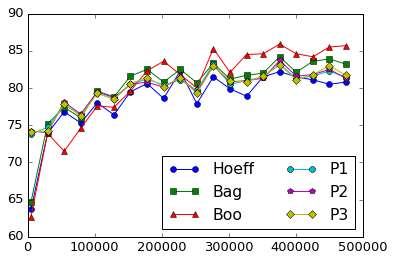

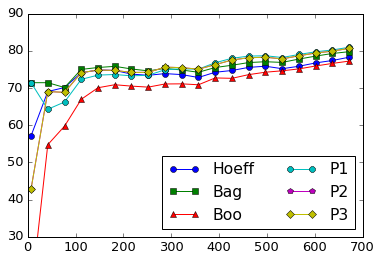

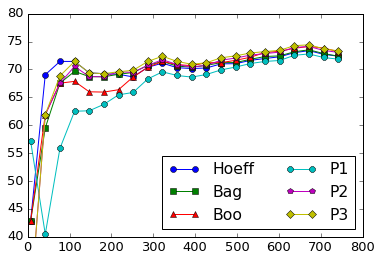

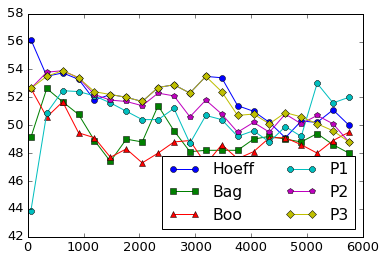

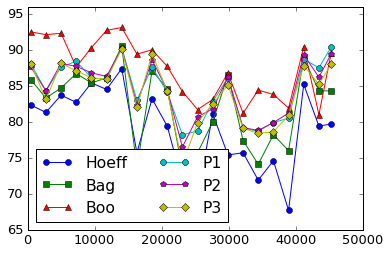

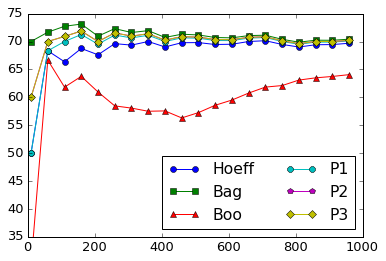

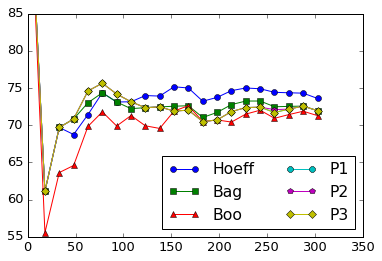

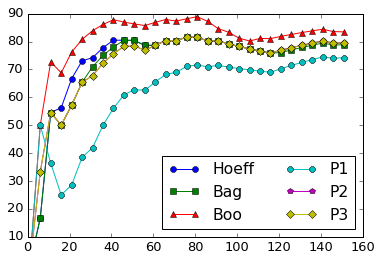

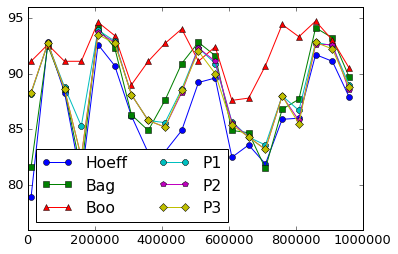

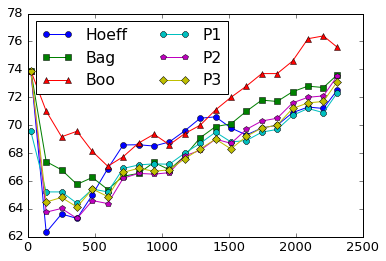

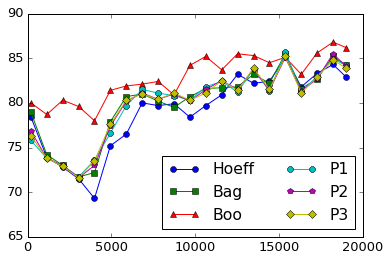

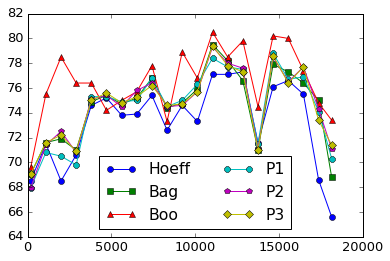

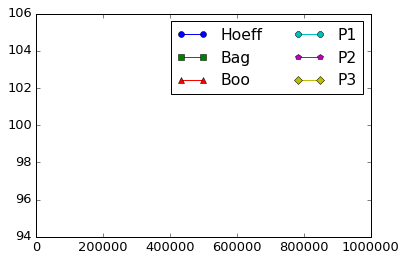

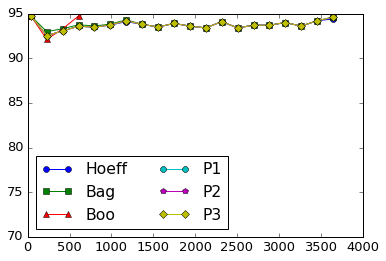

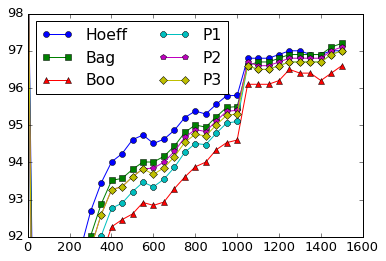

In [2]:
pth = 'outputs/'
base = 'hoeff'
algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-'+base, 'pame2-'+base, 'pame3-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'classifications correct (percent)'
TZ = 'model cost (RAM-Hours)'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [70,95], [92,98], [75,100]]


accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
                
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[F][t], marker=mrk[i])
        accs[j, i] = df[F].mean()
        mdlcst[j, i] = df[TZ].mean()
    
    
    plt.ylim(z[0],z[1])
    plt.legend(["Hoeff", "Bag", "Boo", "P1", "P2", "P3"], ncol=2, loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'-error.pdf', format='pdf')


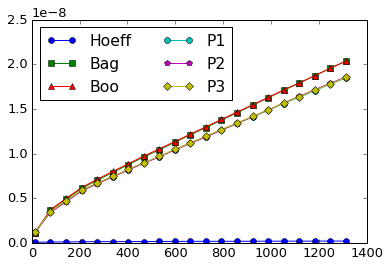

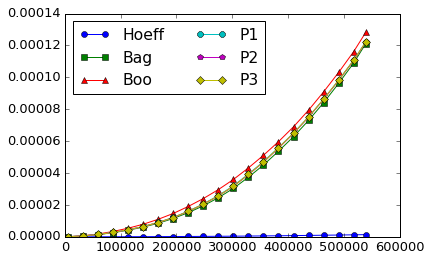

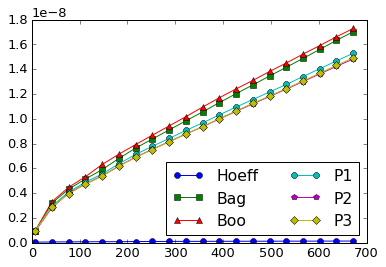

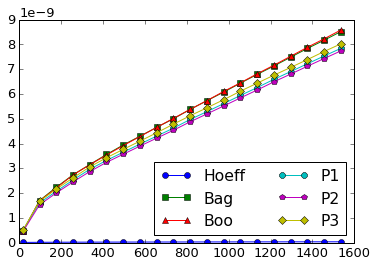

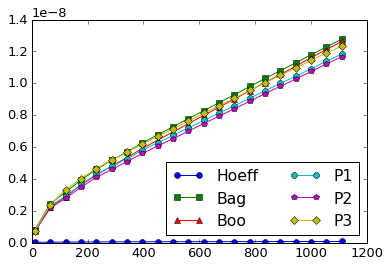

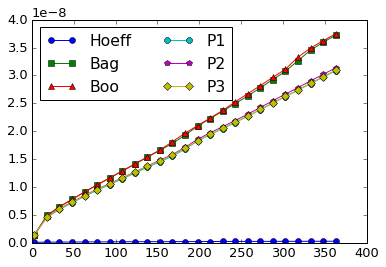

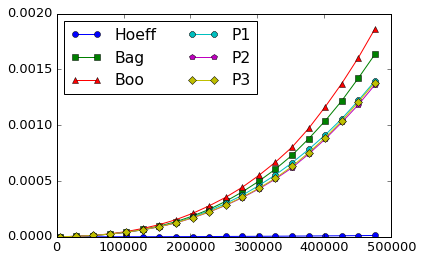

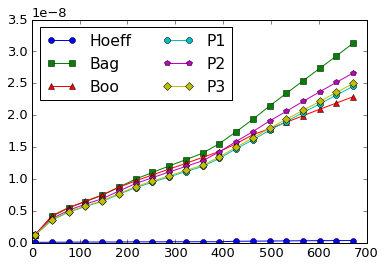

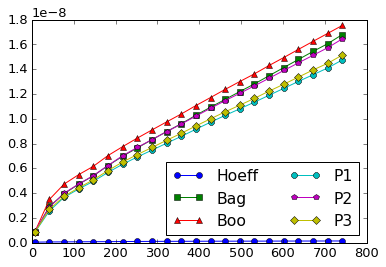

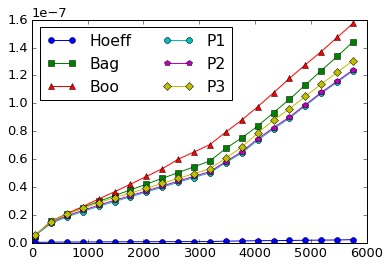

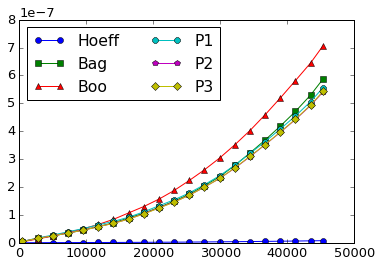

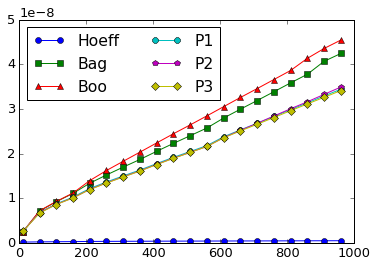

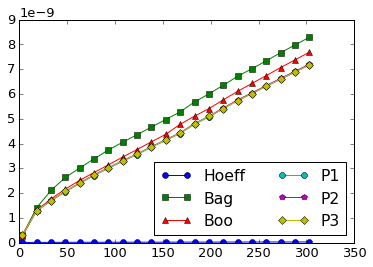

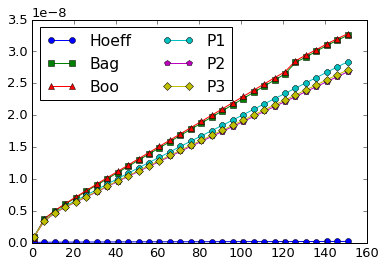

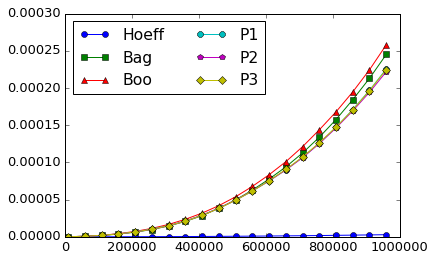

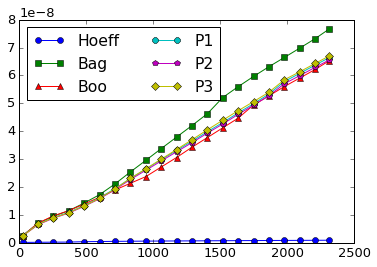

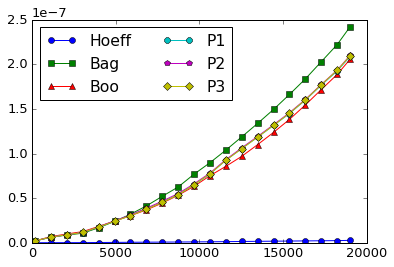

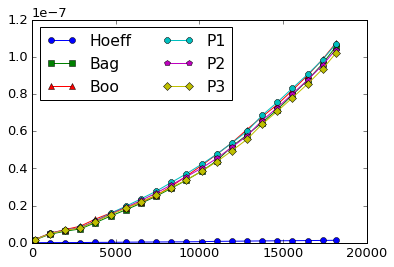

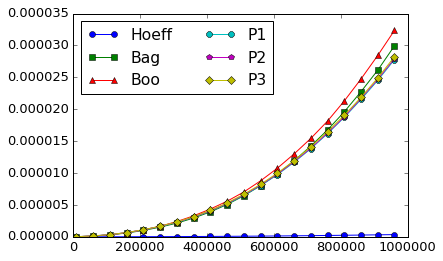

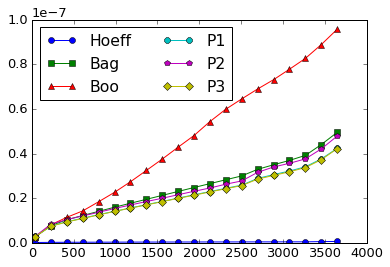

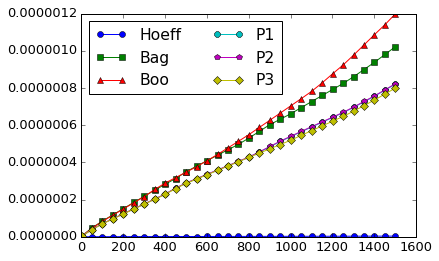

In [3]:
pth = 'outputs/'
base = 'hoeff'
algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-'+base, 'pame2-'+base, 'pame3-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
TZ = 'model cost (RAM-Hours)'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [70,95], [92,98], [75,100]]


for j in range(ndatas):
    z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
                
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[TZ][t], marker=mrk[i])    
    
    #plt.ylim(z[0],z[1])
    plt.legend(["Hoeff", "Bag", "Boo", "P1", "P2", "P3"], ncol=2, loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'-model-cost.pdf', format='pdf')


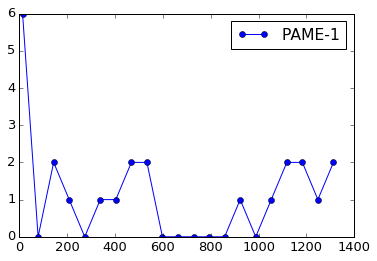

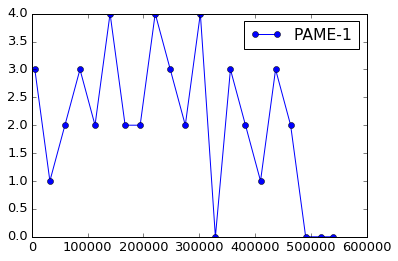

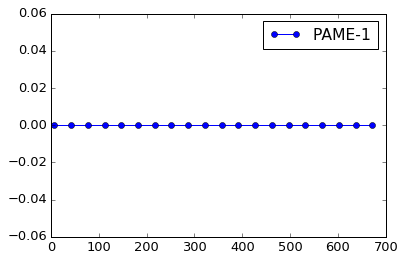

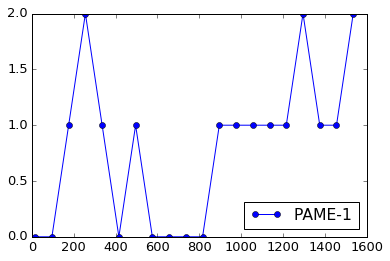

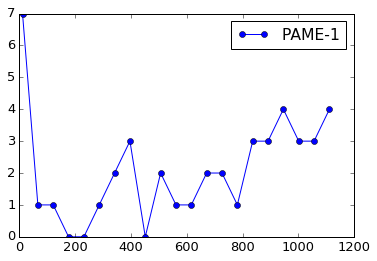

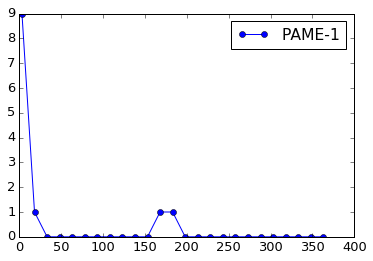

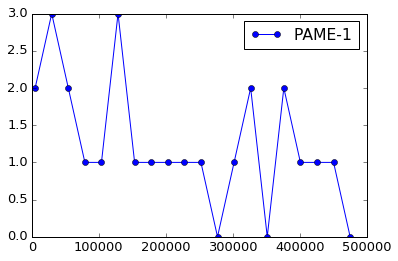

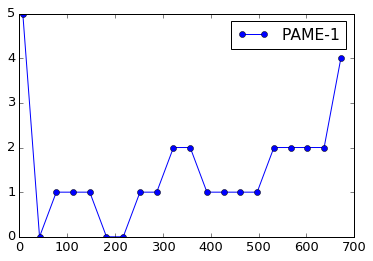

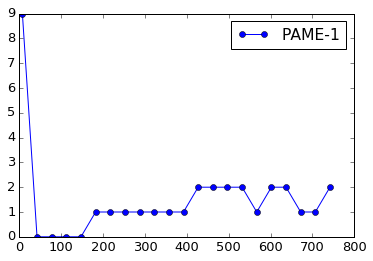

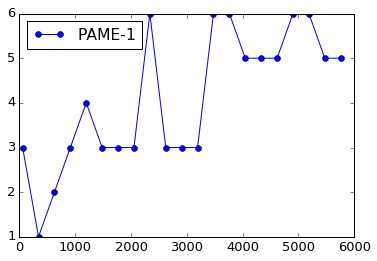

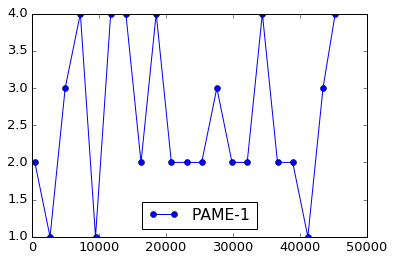

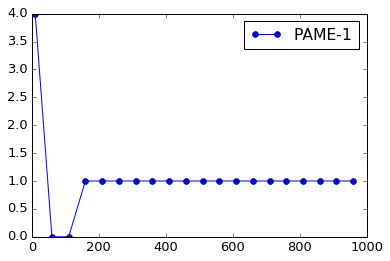

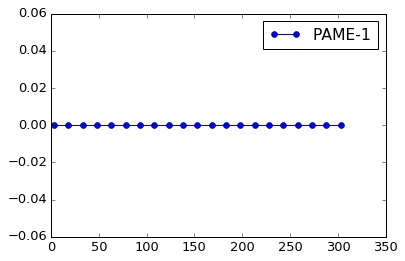

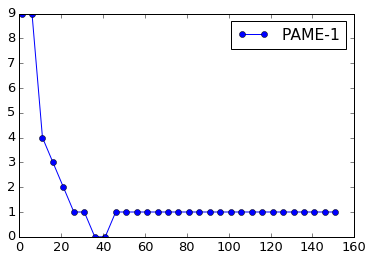

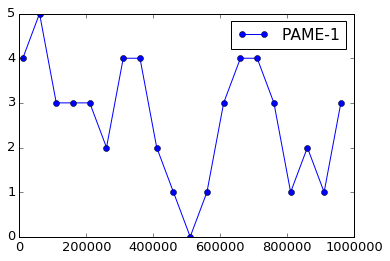

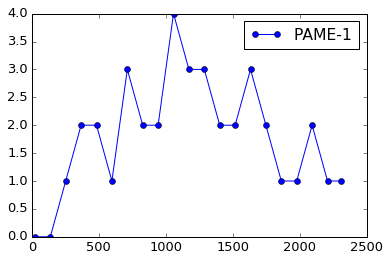

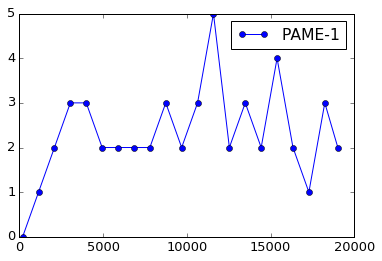

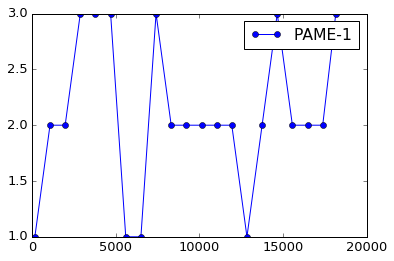

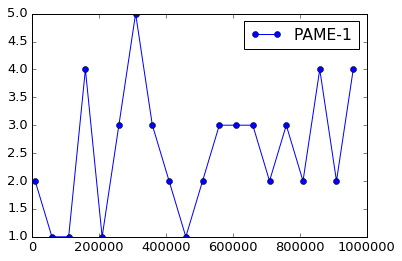

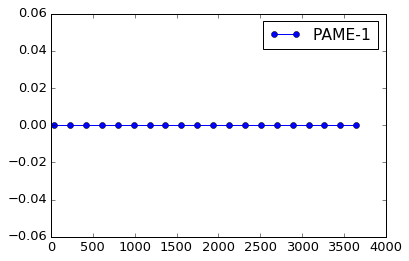

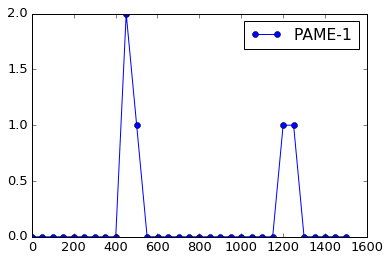

In [4]:
pth = 'outputs/'
base = 'hoeff'
algs = ['pame1-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'negative weights'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [70,95], [92,98], [75,100]]


accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
                
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[F][t], marker=mrk[i])
        accs[j, i] = df[F].mean()
        mdlcst[j, i] = df[TZ].mean()
    
    
    #plt.ylim(z[0],z[1])
    plt.legend(["PAME-1"], loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'nweights.pdf', format='pdf')


# Statistical Hypothesis Testing

Apply the Friedman test and Bonferroni-Dunn test as described by Janez Demsar. 

In [11]:
pth = 'outputs/'
base = 'hoeff'
algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-'+base, 'pame2-'+base, 'pame3-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'classifications correct (percent)'

accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    for i in range(nalg):
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        accs[j, i] = df[F].mean()

Z = np.zeros((nalg, nalg))
ranks = np.zeros((ndatas, nalg))
for i in range(ndatas):
    ranks[i] = nalg-np.argsort(accs[i])
R = ranks.mean(axis=0)

# chi-squared stat
XF = 12*ndatas/(nalg*(nalg+1)) * ((R**2).sum() - (nalg*(nalg+1)**2)/4)
FF = (ndatas-1)*XF/(ndatas*(nalg-1)-XF)


pF = 1 - f.cdf(FF, nalg-1, (nalg-1)*(ndatas-1))
if pF < 0.05: 
    print "Friedman: Reject the Null Hypothesis"
else:
    print "Friedman: Fail to Reject the Null Hypothesis"
print " "        

for i in range(nalg):
    for j in range(nalg):
        Z[i,j] = (R[i]-R[j])/(np.sqrt(1.*(nalg*(nalg+1))/(6*ndatas)))

        
s = ' & '
for alg in algs: 
    s += alg + ' & '
print s

for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(np.round(1000*accs[j,i])/1000) + ' (' + str(ranks[j,i]) + ') & '
    s += str(np.round(1000*accs[j,nalg-1])/1000) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

Friedman: Reject the Null Hypothesis
 
 & hoeff & bagging-hoeff & boosting-hoeff & pame1-hoeff & pame2-hoeff & pame3-hoeff & 
abalone_v2 & 58.998 (4.0) & 59.796 (3.0) & 55.464 (6.0) & 58.714 (2.0) & 59.012 (1.0) & 59.142 (5.0) \\
airlines & 66.799 (4.0) & 68.329 (6.0) & 66.725 (3.0) & 67.824 (1.0) & 67.969 (2.0) & 67.866 (5.0) \\
breast-w & 90.621 (4.0) & 90.621 (1.0) & 90.287 (6.0) & 90.931 (5.0) & 90.697 (2.0) & 90.594 (3.0) \\
car_v2 & 84.37 (6.0) & 84.546 (5.0) & 89.373 (3.0) & 84.701 (1.0) & 85.204 (2.0) & 84.996 (4.0) \\
cmc_v2 & 62.042 (5.0) & 60.934 (4.0) & 61.306 (1.0) & 62.08 (2.0) & 62.04 (6.0) & 62.02 (3.0) \\
colic & 72.212 (3.0) & 71.742 (5.0) & 73.631 (6.0) & 71.741 (4.0) & 73.987 (2.0) & 73.987 (1.0) \\
cov_v2 & 78.409 (6.0) & 80.249 (3.0) & 80.722 (1.0) & 79.619 (2.0) & 79.722 (5.0) & 79.649 (4.0) \\
credit-a & 74.07 (4.0) & 75.539 (6.0) & 69.727 (3.0) & 74.849 (2.0) & 75.358 (1.0) & 75.358 (5.0) \\
diabetes & 70.103 (3.0) & 69.336 (5.0) & 69.539 (4.0) & 66.303 (2.0) &

In [12]:
pth = 'outputs/'
base = 'hoeff'
algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-'+base, 'pame2-'+base, 'pame3-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'model cost (RAM-Hours)'
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    for i in range(nalg):
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        mdlcst[j, i] = df[F].mean()
        
Z = np.zeros((nalg, nalg))
ranks = np.zeros((ndatas, nalg))
for i in range(ndatas):
    ranks[i] = np.argsort(mdlcst[i])+1
R = ranks.mean(axis=0)

# chi-squared stat
XF = 12*ndatas/(nalg*(nalg+1)) * ((R**2).sum() - (nalg*(nalg+1)**2)/4)
FF = (ndatas-1)*XF/(ndatas*(nalg-1)-XF)

pF = 1 - f.cdf(FF, nalg-1, (nalg-1)*(ndatas-1))
if pF < 0.05: 
    print "Friedman: Reject the Null Hypothesis"
else:
    print "Friedman: Fail to Reject the Null Hypothesis"
print " "        


for i in range(nalg):
    for j in range(nalg):
        Z[i,j] = (R[i]-R[j])/(np.sqrt(1.*(nalg*(nalg+1))/(6*ndatas)))
        
for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(100000000*mdlcst[j,i]) + ' (' + str(ranks[j,i]) + ') & '
    s += str(mdlcst[j,nalg-1]) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

Friedman: Reject the Null Hypothesis
 
abalone_v2 & 0.0152028858586 (1.0) & 1.20094659009 (5.0) & 1.20795513299 (4.0) & 1.10730815138 (6.0) & 1.1069509281 (2.0) & 1.1110020692e-08 (3.0) \\
airlines & 45.0509888447 (1.0) & 3750.87115608 (2.0) & 4169.51403242 (5.0) & 3875.09233249 (6.0) & 3855.83166553 (4.0) & 3.86566962828e-05 (3.0) \\
breast-w & 0.0111022079632 (1.0) & 1.03112293368 (5.0) & 1.06151680479 (6.0) & 0.941106464933 (4.0) & 0.91255112529 (2.0) & 9.14797748169e-09 (3.0) \\
car_v2 & 0.00321047427903 (1.0) & 0.524141356369 (5.0) & 0.525375005788 (4.0) & 0.484541164459 (6.0) & 0.475693475736 (2.0) & 4.98304345019e-09 (3.0) \\
cmc_v2 & 0.00658229145216 (1.0) & 0.778638931696 (5.0) & 0.751715294048 (4.0) & 0.721185423768 (3.0) & 0.703452074242 (6.0) & 7.62854753298e-09 (2.0) \\
colic & 0.0209273867961 (1.0) & 2.00555277583 (4.0) & 2.02477295531 (6.0) & 1.72836571177 (5.0) & 1.75847882437 (2.0) & 1.73787298937e-08 (3.0) \\
cov_v2 & 416.172769279 (1.0) & 51428.5401059 (5.0) & 57711.

In [ ]:
for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(np.round(1000*accs[j,i])/1000) + ' (' + str(ranks[j,i]) + ') & '
    s += str(np.round(1000*accs[j,nalg-1])/1000) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

In [ ]:
df

In [ ]:
plt.plot(df['negative weights'])